# Analyse des données : pollution / années
## Projet DALAS
### SOYKOK Aylin - CELIK Simay

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('../data/data_pollution.csv')
for column in df.columns:
    if column != 'Country':
        df[column] = pd.to_numeric(df[column], errors='coerce')
# loading the fashion data
df_fast = pd.read_pickle('../data/fastfashion_clean.pkl')
df_slow = pd.read_pickle('../data/slowfashion_clean.pkl')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country                                           218 non-null    object 
 1   Air Pollution                                     218 non-null    float64
 2   Drinking Water Pollution and Inaccessibility      218 non-null    float64
 3   Dissatisfaction with Garbage Disposal             218 non-null    float64
 4   Dirty and Untidy                                  218 non-null    float64
 5   Noise and Light Pollution                         218 non-null    float64
 6   Water Pollution                                   218 non-null    float64
 7   Dissatisfaction with Spending Time in the City    218 non-null    float64
 8   Dissatisfaction with Green and Parks in the City  218 non-null    float64
dtypes: float64(8), object(

In [18]:
df.describe()

,Air Pollution,Drinking Water Pollution and Inaccessibility,Dissatisfaction with Garbage Disposal,Dirty and Untidy,Noise and Light Pollution,Water Pollution,Dissatisfaction with Spending Time in the City,Dissatisfaction with Green and Parks in the City
count,218.000000,218.000000,218.000000,218.000000,218.00000,218.000000,218.000000,218.000000
mean,47.653532,40.869404,55.437844,54.262890,47.26078,52.052661,45.251743,48.589128
std,22.967446,21.435411,23.539736,22.087037,17.68600,23.103120,21.756046,20.973753
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,30.470000,26.617500,38.290000,40.445000,37.35750,37.335000,28.360000,33.947500
50%,50.000000,41.555000,57.910000,57.030000,50.00000,54.320000,50.000000,50.000000
75%,65.037500,56.097500,72.605000,70.982500,57.10250,68.980000,61.145000,64.215000
max,95.830000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000


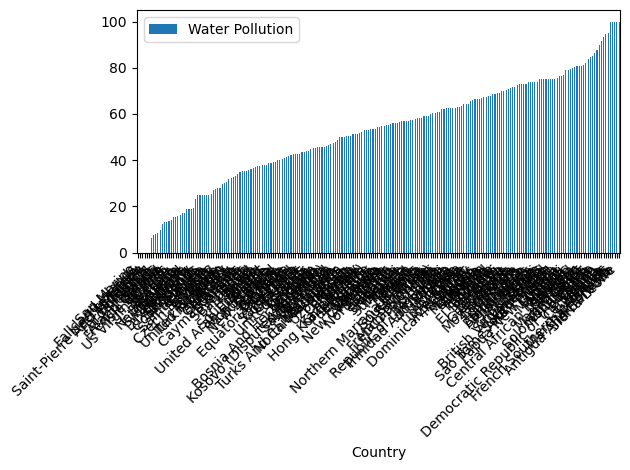

In [19]:

sorted_df = df.sort_values('Water Pollution', ascending=True)
ax = sorted_df.plot(x='Country', y='Water Pollution', kind='bar')
ax.set_xticklabels(sorted_df['Country'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

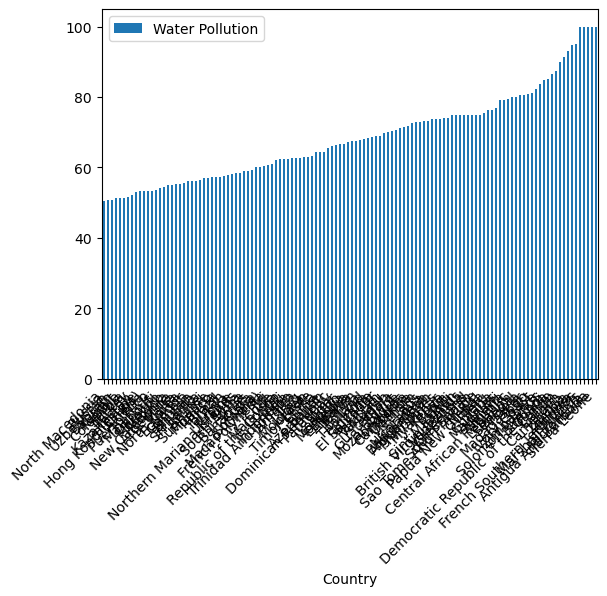

<Figure size 2000x200 with 0 Axes>

In [20]:
sorted_top = sorted_df[sorted_df['Water Pollution'] > 50]
ax = sorted_top.plot(x='Country', y='Water Pollution', kind='bar')
plt.figure(figsize=(20, 2))
ax.set_xticklabels(sorted_top['Country'], rotation=45, ha='right')
#plt.tight_layout()
plt.show()

In [21]:
sorted_top["Country"]

143                North Macedonia
162                         Russia
211                     Uzbekistan
15                         Bahrain
103                         Kuwait
                  ...             
67     French Southern Territories
121               Marshall Islands
126                     Micronesia
7              Antigua And Barbuda
174                   Sierra Leone
Name: Country, Length: 124, dtype: object

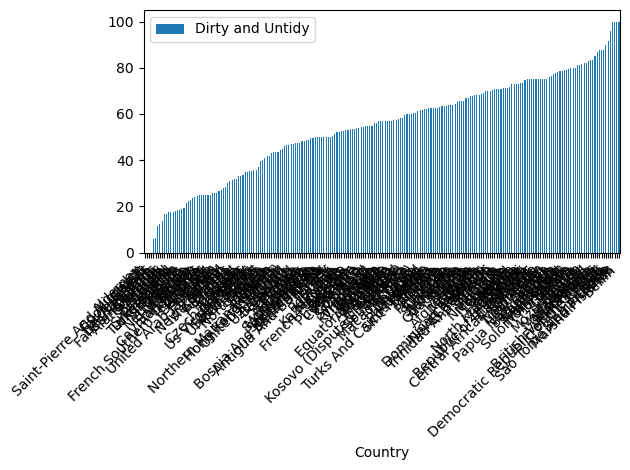

In [22]:
sorted_df = df.sort_values('Dirty and Untidy', ascending=True)
ax = sorted_df.plot(x='Country', y='Dirty and Untidy', kind='bar')
ax.set_xticklabels(sorted_df['Country'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

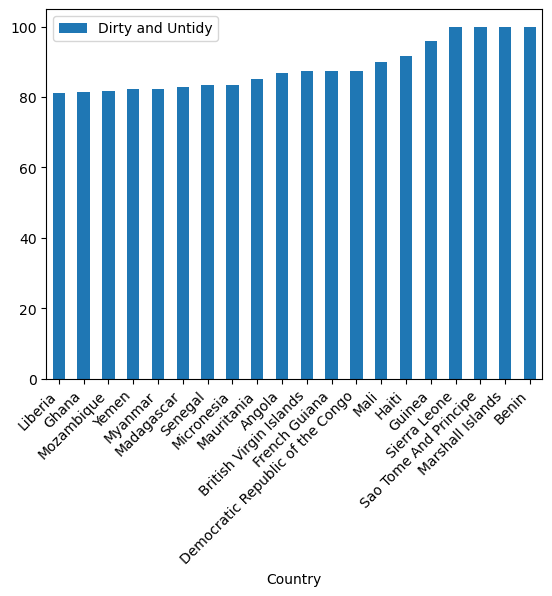

<Figure size 2000x200 with 0 Axes>

In [23]:
sorted_top = sorted_df.iloc[-20:]
ax = sorted_top.plot(x='Country', y='Dirty and Untidy', kind='bar')
plt.figure(figsize=(20, 2))
ax.set_xticklabels(sorted_top['Country'], rotation=45, ha='right')
#plt.tight_layout()
plt.show()

in EDA for the brands, we saw production countries. Looking into those countries:

In [25]:
explode_pays = df_slow['Country'].explode()
unique_pays = explode_pays.unique()
print("Pays de fabrications differents Everlane:",len(unique_pays))
print(unique_pays)
print("---------------------")
explode_pays_hm = df_fast['Pays concernés'].explode()
unique_pays_hm = explode_pays_hm.unique()
print("Pays de fabrications differents H&M:",len(unique_pays_hm))
print(unique_pays_hm)

Pays de fabrications differents Everlane: 6
['Sri Lanka' 'Vietnam' 'China' 'Peru' 'Korea' 'Bangladesh']
---------------------
Pays de fabrications differents H&M: 18
['Bangladesh' 'Chine' 'Pakistan' 'Inde' 'Vietnam' 'Turquie' 'Birmanie'
 'Cambodge' 'Indonésie' 'Maroc' 'Bulgaria' 'Guatemala' 'Kenya' 'Honduras'
 'Roumanie' 'Mexique' 'Ethiopie' 'Italy']


In [38]:
slow_country_counts = df_slow['Country'].explode().value_counts()
slow_country_counts

Country
Vietnam       273
Sri Lanka      68
China          33
Bangladesh      5
Peru            3
Korea           3
Name: count, dtype: int64

In [40]:
fast_country_counts = df_fast['Pays concernés'].explode().value_counts()
fast_country_counts

Pays concernés
Bangladesh    951
Chine         935
Turquie       370
Birmanie      234
Inde          179
Cambodge      177
Indonésie     153
Pakistan      134
Vietnam        69
Maroc          20
Bulgaria       16
Roumanie       15
Mexique        10
Guatemala       4
Italy           4
Honduras        2
Ethiopie        2
Kenya           1
Name: count, dtype: int64

In [42]:
# countries for H&M
# changing the names to english
unique_pays_hm = ['Bangladesh', 'China', 'Pakistan','India' ,'Vietnam', 'Turkey', 'Birmany'
 'Cambodgia', 'Indonesia', 'Morocco', 'Bulgaria', 'Guatemala', 'Kenya', 'Honduras',
 'Romania', 'Mexico', 'Ethiopia', 'Italy']
info_fast = df[df['Country'].isin(unique_pays_hm)]
info_fast

,Country,Air Pollution,Drinking Water Pollution and Inaccessibility,Dissatisfaction with Garbage Disposal,Dirty and Untidy,Noise and Light Pollution,Water Pollution,Dissatisfaction with Spending Time in the City,Dissatisfaction with Green and Parks in the City
16,Bangladesh,78.19,56.20,78.35,77.70,63.37,73.74,73.86,67.45
30,Bulgaria,68.00,30.19,56.04,58.01,50.51,40.78,50.70,33.88
39,China,79.94,55.38,49.25,48.17,55.67,64.36,70.21,39.84
59,Ethiopia,62.31,59.15,75.71,73.26,59.78,67.50,57.04,69.92
78,Guatemala,63.64,60.58,70.00,65.57,55.66,70.67,55.45,55.29
83,Honduras,65.13,55.65,77.50,79.69,49.22,71.88,59.29,59.17
87,India,64.85,52.30,66.35,62.73,58.98,68.66,59.59,52.06
88,Indonesia,60.48,47.46,64.86,56.27,50.72,62.58,54.58,52.71
94,Italy,50.32,31.37,49.11,54.91,48.51,40.69,43.77,46.75
101,Kenya,58.18,56.49,68.93,67.96,49.03,74.03,53.74,43.51


In [34]:
# countries for Everlane
# change Korea to South Korea
unique_pays_slow = ["South Korea" if item == "Korea" else item for item in unique_pays]
info_slow = df[df['Country'].isin(unique_pays_slow)]
info_slow

,Country,Air Pollution,Drinking Water Pollution and Inaccessibility,Dissatisfaction with Garbage Disposal,Dirty and Untidy,Noise and Light Pollution,Water Pollution,Dissatisfaction with Spending Time in the City,Dissatisfaction with Green and Parks in the City
16,Bangladesh,78.19,56.20,78.35,77.70,63.37,73.74,73.86,67.45
39,China,79.94,55.38,49.25,48.17,55.67,64.36,70.21,39.84
153,Peru,76.60,61.96,64.44,70.93,67.91,76.31,64.34,54.66
182,South Korea,68.63,28.28,37.54,37.02,49.82,37.86,56.58,39.45
185,Sri Lanka,53.34,35.30,58.59,48.12,50.51,56.94,48.24,41.49
214,Vietnam,78.06,56.52,75.94,71.07,64.76,73.02,69.67,58.04
